# Q4

import the libraries

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

read both images and plot them

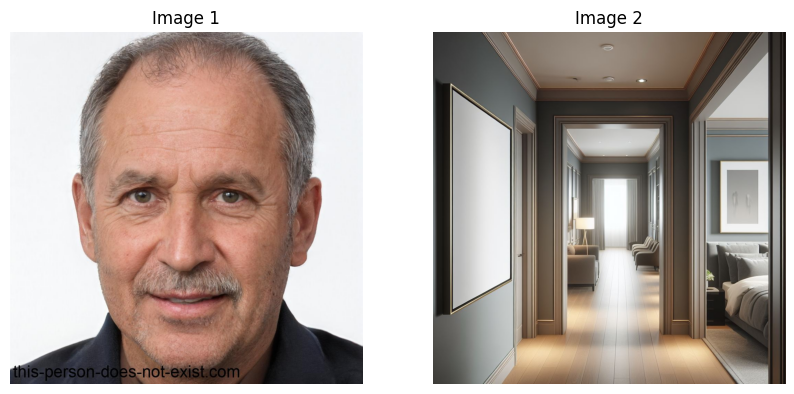

In [83]:
# Read the first image
grandpa = cv2.imread(os.path.join('images/', 'q4_grandpa.jpeg'))

# OpenCV reads images in BGR format, so we need to convert it to RGB
grandpa_rgb = cv2.cvtColor(grandpa, cv2.COLOR_BGR2RGB)

# Read the second image
room = cv2.imread(os.path.join('images/', 'q4_room.jpeg'))

# Convert the second image to RGB format
room_rgb = cv2.cvtColor(room, cv2.COLOR_BGR2RGB)

# Plot both images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grandpa_rgb)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(room_rgb)
plt.title('Image 2')
plt.axis('off')

plt.show()


add black ribbon to grandpa image

In [109]:
# grandpa_rgb.shape

(1024, 1024, 3)

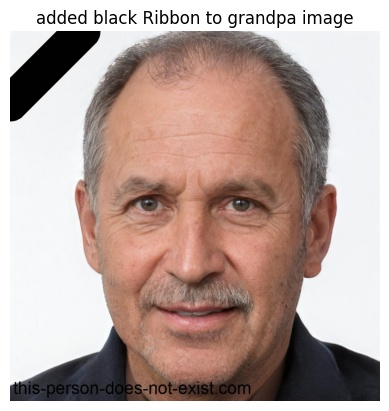

In [85]:
cv2.line(grandpa_rgb, (0, 200), (200, 0), color=[1]*3, thickness=100)

plt.imshow(grandpa_rgb)
plt.title('added black Ribbon to grandpa image')
plt.axis('off')
plt.show()

define the coordinates of destination image

In [105]:
# the frame in the left side of the wall is our destination
destination = np.array([[60, 160], [200, 280], [220, 725], [55, 830]], dtype=np.float32)

get the transform matrix

In [106]:
# we use corner of grandpa rgb as points to pass to our func to get transformation matrix
grandpa_rgb_points = np.array([
    [0, 0],
    [grandpa_rgb.shape[1], 0],
    [grandpa_rgb.shape[1], grandpa_rgb.shape[0]],
    [0, grandpa_rgb.shape[0]]
], dtype=np.float32)

# as we know this is a projective transformation
projective_transform_matrix = cv2.getPerspectiveTransform(grandpa_rgb_points, destination)

apply the transform and plot the result

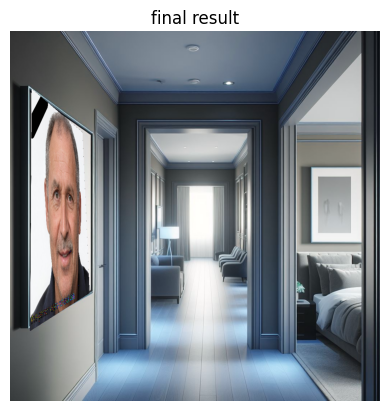

In [108]:
## projective transform a whole image
projected_image= cv2.warpPerspective(grandpa_rgb, projective_transform_matrix, (room.shape[1], room.shape[0]))


# Create a copy of 'room' for the final image
final_image = room.copy()

# Define the region of interest (ROI) where the projected image is not zero
ROI = projected_image != 0

# Overlay the projected image onto the final image
final_image[ROI] = projected_image[ROI]

plt.imshow(final_image)
plt.title('final result')
plt.axis('off')
plt.show()